In [1]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import netCDF4 as nc4
import smoothlib
import geog_funcs


1.6.1


requested fields
Variable (analysis);  CMIP6 CMOR name / ESGF archive name
- YEAR
- ST (degree Celsius); tas - 273.15
- CO2 (ppm); co2, It will be similar in all models but likely not exactly the same despite they are all 1pctCO2 runs.
- Land-atmosphere CO2 flux (Pg C/yr); netAtmosLandCO2Flux (converted from kg CO2 m-2 s-1 to PgC/yr)
- Ocean-atmosphere CO2 flux (Pg C/yr); FGCO2 (converted from kg CO2 m-2 s-1 to PgC/yr) 
- GPP (Pg C/yr); Gpp
- NPP (Pg C/yr); Npp
- Heterotrophic respiration, HETRES or Rh (Pg C/yr); rh = rhSoil+rhLitter
- Live vegetation biomass, CLIVE or Cv (Pg C); cVeg
- Dead biomass on land, CDEAD or Cs  (Pg C); cSoil + cLitter


In [2]:
## load the native lnd/atm map grid files
area_file = nc4.Dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
area = area_file.variables['areacella'][:]
lat = area_file.variables['lat'][:]
lon = area_file.variables['lon'][:]

JM = len(lat)
IM = len(lon)

## load the native ocean map grid files
area_file_ocn_gn = nc4.Dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
area_ocn_gn = area_file_ocn_gn.variables['areacello'][:]
lat_ocn_gn = area_file_ocn_gn.variables['lat'][:]
lon_ocn_gn = area_file_ocn_gn.variables['lon'][:]

JM_ocn_gn = len(lat_ocn_gn)
IM_ocn_gn = len(lon_ocn_gn)

## load the modified ocean map grid files
area_file_ocn_gr = nc4.Dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gr.nc')
area_ocn_gr = area_file_ocn_gr.variables['areacello'][:]
lat_ocn_gr = area_file_ocn_gr.variables['lat'][:]
lon_ocn_gr = area_file_ocn_gr.variables['lon'][:]

JM_ocn_gr = len(lat_ocn_gr)
IM_ocn_gr = len(lon_ocn_gr)

## and the land and ice grids
sftlf_file = nc4.Dataset('sftlf_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftlf = sftlf_file.variables['sftlf'][:]

sftgif_file = nc4.Dataset('sftgif_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftgif = sftgif_file.variables['sftgif'][:]

area_landonly = area * (sftlf/100.) * (1. - sftgif/100.)



/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  if sys.path[0] == '':
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:30: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:33: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_tas_global


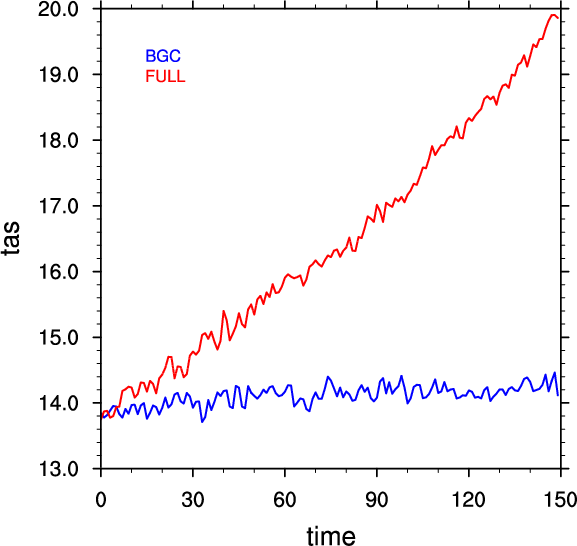

In [3]:
tasfilenames = [
['tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

tasfiles_bgc=[]
for i in range(len(tasfilenames[0])):
    tasfiles_bgc.append(nc4.Dataset(tasfilenames[0][i]))

tasfiles_ful=[]
for i in range(len(tasfilenames[1])):
    tasfiles_ful.append(nc4.Dataset(tasfilenames[1][i]))

tas_bgc = np.ma.row_stack((tasfiles_bgc[0].variables['tas'][:],tasfiles_bgc[1].variables['tas'][:],tasfiles_bgc[2].variables['tas'][:]))- 273.15
tas_bgc_annual = smoothlib.monthly_to_annual(tas_bgc)
tas_bgc_global_annual = geog_funcs.area_average(tas_bgc_annual, lat, lon, area=area)

tas_ful = np.ma.row_stack((tasfiles_ful[0].variables['tas'][:],tasfiles_ful[1].variables['tas'][:],tasfiles_ful[2].variables['tas'][:]))- 273.15
tas_ful_annual = smoothlib.monthly_to_annual(tas_ful)
tas_ful_global_annual = geog_funcs.area_average(tas_ful_annual, lat, lon, area=area)

map_funcs.xyplot(np.arange(len(tas_ful_global_annual)), np.row_stack((tas_bgc_global_annual,tas_ful_global_annual)), file='c4mip_tas_global', ytitle='tas', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])

/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_co2_global


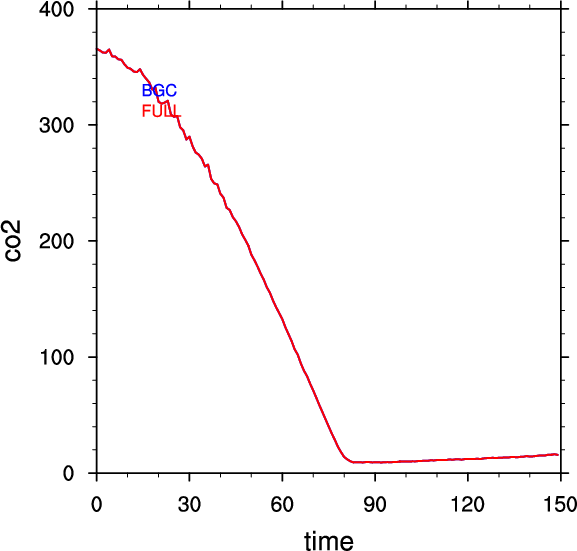

In [4]:
co2filenames = [
['co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'],
['co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'co2_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

co2files_bgc=[]
for i in range(len(co2filenames[0])):
    co2files_bgc.append(nc4.Dataset(co2filenames[0][i]))

co2files_ful=[]
for i in range(len(co2filenames[1])):
    co2files_ful.append(nc4.Dataset(co2filenames[1][i]))

co2_bgc = np.ma.row_stack((co2files_bgc[0].variables['co2'][:,0,:,:],co2files_bgc[1].variables['co2'][:,0,:,:],co2files_bgc[2].variables['co2'][:,0,:,:])) * 1e6
co2_bgc_annual = smoothlib.monthly_to_annual(co2_bgc)
co2_bgc_global_annual = geog_funcs.area_average(co2_bgc_annual, lat, lon, area=area)

co2_ful = np.ma.row_stack((co2files_ful[0].variables['co2'][:,0,:,:],co2files_ful[1].variables['co2'][:,0,:,:],co2files_ful[2].variables['co2'][:,0,:,:]))  * 1e6
co2_ful_annual = smoothlib.monthly_to_annual(co2_ful)
co2_ful_global_annual = geog_funcs.area_average(co2_ful_annual, lat, lon, area=area)

map_funcs.xyplot(np.arange(len(co2_ful_global_annual)), np.row_stack((co2_bgc_global_annual,co2_ful_global_annual)), file='c4mip_co2_global', ytitle='co2', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])

/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_atm2lnd_global


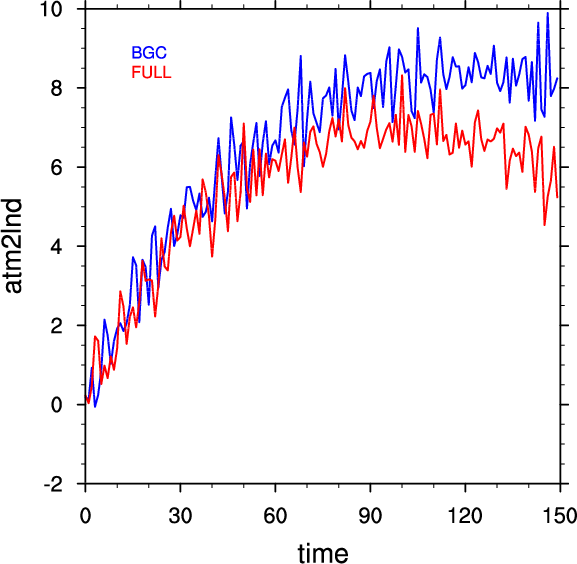

In [5]:
atm2lndfilenames = [
['netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

atm2lndfiles_bgc=[]
for i in range(len(atm2lndfilenames[0])):
    atm2lndfiles_bgc.append(nc4.Dataset(atm2lndfilenames[0][i]))

atm2lndfiles_ful=[]
for i in range(len(atm2lndfilenames[1])):
    atm2lndfiles_ful.append(nc4.Dataset(atm2lndfilenames[1][i]))

atm2lnd_bgc = np.ma.row_stack((atm2lndfiles_bgc[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_bgc[1].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_bgc[2].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_bgc_annual = smoothlib.monthly_to_annual(atm2lnd_bgc)
atm2lnd_bgc_global_annual = geog_funcs.area_integrate(atm2lnd_bgc_annual, lat, lon, area=area)  * 86400.*365. / 1e12

atm2lnd_ful = np.ma.row_stack((atm2lndfiles_ful[0].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_ful[1].variables['netAtmosLandCO2Flux'][:],atm2lndfiles_ful[2].variables['netAtmosLandCO2Flux'][:]))
atm2lnd_ful_annual = smoothlib.monthly_to_annual(atm2lnd_ful)
atm2lnd_ful_global_annual = geog_funcs.area_integrate(atm2lnd_ful_annual, lat, lon, area=area) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2lnd_ful_global_annual)), np.row_stack((atm2lnd_bgc_global_annual,atm2lnd_ful_global_annual)), file='c4mip_atm2lnd_global', ytitle='atm2lnd', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])




/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_atm2ocn_gr_global


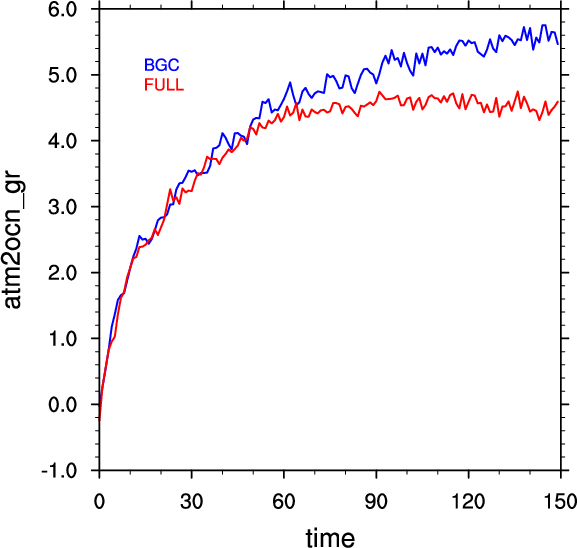

In [6]:
atm2ocn_grfilenames = [
['fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gr_010101-015012.nc'],
['fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gr_010101-015012.nc']
]

atm2ocn_grfiles_bgc=[]
for i in range(len(atm2ocn_grfilenames[0])):
    atm2ocn_grfiles_bgc.append(nc4.Dataset(atm2ocn_grfilenames[0][i]))

atm2ocn_grfiles_ful=[]
for i in range(len(atm2ocn_grfilenames[1])):
    atm2ocn_grfiles_ful.append(nc4.Dataset(atm2ocn_grfilenames[1][i]))

atm2ocn_gr_bgc = np.ma.row_stack((atm2ocn_grfiles_bgc[0].variables['fgco2'][:],atm2ocn_grfiles_bgc[1].variables['fgco2'][:],atm2ocn_grfiles_bgc[2].variables['fgco2'][:]))
atm2ocn_gr_bgc_annual = smoothlib.monthly_to_annual(atm2ocn_gr_bgc)
atm2ocn_gr_bgc_global_annual = geog_funcs.area_integrate(atm2ocn_gr_bgc_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr)  * 86400.*365. / 1e12

atm2ocn_gr_ful = np.ma.row_stack((atm2ocn_grfiles_ful[0].variables['fgco2'][:],atm2ocn_grfiles_ful[1].variables['fgco2'][:],atm2ocn_grfiles_ful[2].variables['fgco2'][:]))
atm2ocn_gr_ful_annual = smoothlib.monthly_to_annual(atm2ocn_gr_ful)
atm2ocn_gr_ful_global_annual = geog_funcs.area_integrate(atm2ocn_gr_ful_annual, lat_ocn_gr, lon_ocn_gr, area=area_ocn_gr) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2ocn_gr_ful_global_annual)), np.row_stack((atm2ocn_gr_bgc_global_annual,atm2ocn_gr_ful_global_annual)), file='c4mip_atm2ocn_gr_global', ytitle='atm2ocn_gr', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])





/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_atm2ocn_gn_global


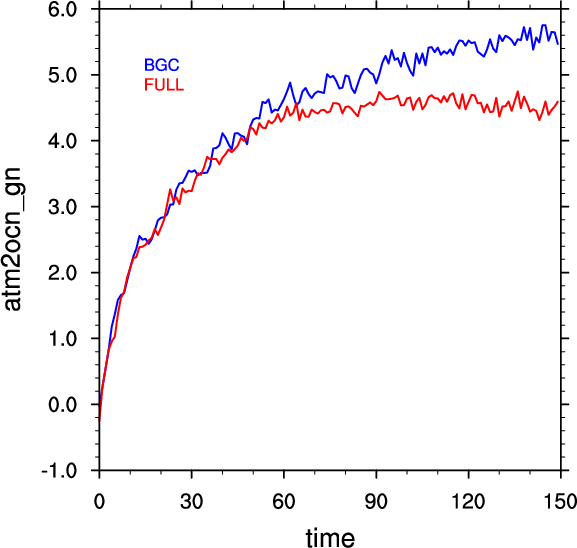

In [7]:
atm2ocn_gnfilenames = [
['fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

atm2ocn_gnfiles_bgc=[]
for i in range(len(atm2ocn_gnfilenames[0])):
    atm2ocn_gnfiles_bgc.append(nc4.Dataset(atm2ocn_gnfilenames[0][i]))

atm2ocn_gnfiles_ful=[]
for i in range(len(atm2ocn_gnfilenames[1])):
    atm2ocn_gnfiles_ful.append(nc4.Dataset(atm2ocn_gnfilenames[1][i]))

atm2ocn_gn_bgc = np.ma.row_stack((atm2ocn_gnfiles_bgc[0].variables['fgco2'][:],atm2ocn_gnfiles_bgc[1].variables['fgco2'][:],atm2ocn_gnfiles_bgc[2].variables['fgco2'][:]))
atm2ocn_gn_bgc_annual = smoothlib.monthly_to_annual(atm2ocn_gn_bgc)
atm2ocn_gn_bgc_global_annual = geog_funcs.area_integrate(atm2ocn_gn_bgc_annual, None, None, area=area_ocn_gn)  * 86400.*365. / 1e12

atm2ocn_gn_ful = np.ma.row_stack((atm2ocn_gnfiles_ful[0].variables['fgco2'][:],atm2ocn_gnfiles_ful[1].variables['fgco2'][:],atm2ocn_gnfiles_ful[2].variables['fgco2'][:]))
atm2ocn_gn_ful_annual = smoothlib.monthly_to_annual(atm2ocn_gn_ful)
atm2ocn_gn_ful_global_annual = geog_funcs.area_integrate(atm2ocn_gn_ful_annual, None, None, area=area_ocn_gn) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(atm2ocn_gn_ful_global_annual)), np.row_stack((atm2ocn_gn_bgc_global_annual,atm2ocn_gn_ful_global_annual)), file='c4mip_atm2ocn_gn_global', ytitle='atm2ocn_gn', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])





/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_gpp_global


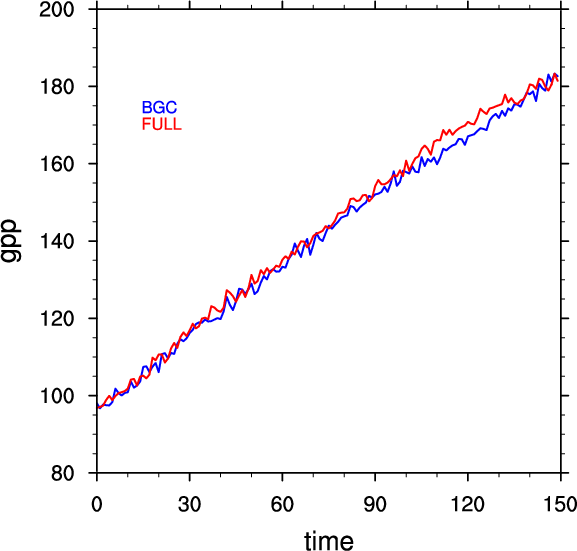

In [8]:
gppfilenames = [
['gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'gpp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'gpp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

gppfiles_bgc=[]
for i in range(len(gppfilenames[0])):
    gppfiles_bgc.append(nc4.Dataset(gppfilenames[0][i]))

gppfiles_ful=[]
for i in range(len(gppfilenames[1])):
    gppfiles_ful.append(nc4.Dataset(gppfilenames[1][i]))

gpp_bgc = np.ma.row_stack((gppfiles_bgc[0].variables['gpp'][:],gppfiles_bgc[1].variables['gpp'][:],gppfiles_bgc[2].variables['gpp'][:]))
gpp_bgc_annual = smoothlib.monthly_to_annual(gpp_bgc)
gpp_bgc_global_annual = geog_funcs.area_integrate(gpp_bgc_annual, lat, lon, area=area_landonly)  * 86400.*365. / 1e12

gpp_ful = np.ma.row_stack((gppfiles_ful[0].variables['gpp'][:],gppfiles_ful[1].variables['gpp'][:],gppfiles_ful[2].variables['gpp'][:]))
gpp_ful_annual = smoothlib.monthly_to_annual(gpp_ful)
gpp_ful_global_annual = geog_funcs.area_integrate(gpp_ful_annual, lat, lon, area=area_landonly) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(gpp_ful_global_annual)), np.row_stack((gpp_bgc_global_annual,gpp_ful_global_annual)), file='c4mip_gpp_global', ytitle='gpp', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])





/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_npp_global


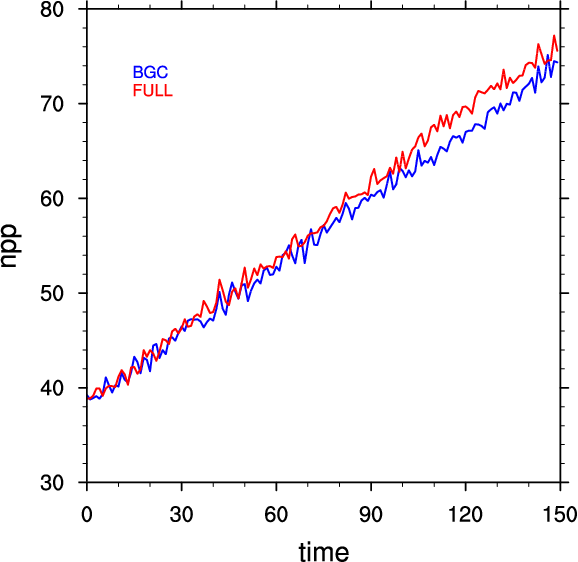

In [9]:
nppfilenames = [
['npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'npp_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'npp_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

nppfiles_bgc=[]
for i in range(len(nppfilenames[0])):
    nppfiles_bgc.append(nc4.Dataset(nppfilenames[0][i]))

nppfiles_ful=[]
for i in range(len(nppfilenames[1])):
    nppfiles_ful.append(nc4.Dataset(nppfilenames[1][i]))

npp_bgc = np.ma.row_stack((nppfiles_bgc[0].variables['npp'][:],nppfiles_bgc[1].variables['npp'][:],nppfiles_bgc[2].variables['npp'][:]))
npp_bgc_annual = smoothlib.monthly_to_annual(npp_bgc)
npp_bgc_global_annual = geog_funcs.area_integrate(npp_bgc_annual, lat, lon, area=area_landonly)  * 86400.*365. / 1e12

npp_ful = np.ma.row_stack((nppfiles_ful[0].variables['npp'][:],nppfiles_ful[1].variables['npp'][:],nppfiles_ful[2].variables['npp'][:]))
npp_ful_annual = smoothlib.monthly_to_annual(npp_ful)
npp_ful_global_annual = geog_funcs.area_integrate(npp_ful_annual, lat, lon, area=area_landonly) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(npp_ful_global_annual)), np.row_stack((npp_bgc_global_annual,npp_ful_global_annual)), file='c4mip_npp_global', ytitle='npp', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])





/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_rh_global


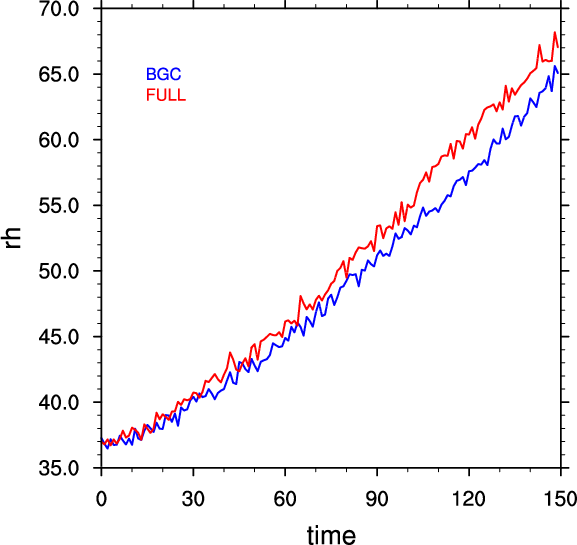

In [10]:
rhfilenames = [
['rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'rh_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'rh_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

rhfiles_bgc=[]
for i in range(len(rhfilenames[0])):
    rhfiles_bgc.append(nc4.Dataset(rhfilenames[0][i]))

rhfiles_ful=[]
for i in range(len(rhfilenames[1])):
    rhfiles_ful.append(nc4.Dataset(rhfilenames[1][i]))

rh_bgc = np.ma.row_stack((rhfiles_bgc[0].variables['rh'][:],rhfiles_bgc[1].variables['rh'][:],rhfiles_bgc[2].variables['rh'][:]))
rh_bgc_annual = smoothlib.monthly_to_annual(rh_bgc)
rh_bgc_global_annual = geog_funcs.area_integrate(rh_bgc_annual, lat, lon, area=area_landonly)  * 86400.*365. / 1e12

rh_ful = np.ma.row_stack((rhfiles_ful[0].variables['rh'][:],rhfiles_ful[1].variables['rh'][:],rhfiles_ful[2].variables['rh'][:]))
rh_ful_annual = smoothlib.monthly_to_annual(rh_ful)
rh_ful_global_annual = geog_funcs.area_integrate(rh_ful_annual, lat, lon, area=area_landonly) * 86400.*365. / 1e12

map_funcs.xyplot(np.arange(len(rh_ful_global_annual)), np.row_stack((rh_bgc_global_annual,rh_ful_global_annual)), file='c4mip_rh_global', ytitle='rh', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])






/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_cVeg_global


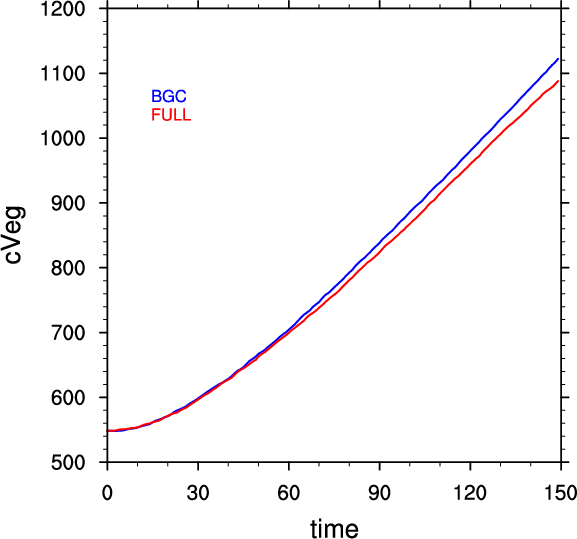

In [11]:
cVegfilenames = [
['cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cVeg_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cVeg_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

cVegfiles_bgc=[]
for i in range(len(cVegfilenames[0])):
    cVegfiles_bgc.append(nc4.Dataset(cVegfilenames[0][i]))

cVegfiles_ful=[]
for i in range(len(cVegfilenames[1])):
    cVegfiles_ful.append(nc4.Dataset(cVegfilenames[1][i]))

cVeg_bgc = np.ma.row_stack((cVegfiles_bgc[0].variables['cVeg'][:],cVegfiles_bgc[1].variables['cVeg'][:],cVegfiles_bgc[2].variables['cVeg'][:]))
cVeg_bgc_annual = smoothlib.monthly_to_annual(cVeg_bgc)
cVeg_bgc_global_annual = geog_funcs.area_integrate(cVeg_bgc_annual, lat, lon, area=area_landonly)  / 1e12

cVeg_ful = np.ma.row_stack((cVegfiles_ful[0].variables['cVeg'][:],cVegfiles_ful[1].variables['cVeg'][:],cVegfiles_ful[2].variables['cVeg'][:]))
cVeg_ful_annual = smoothlib.monthly_to_annual(cVeg_ful)
cVeg_ful_global_annual = geog_funcs.area_integrate(cVeg_ful_annual, lat, lon, area=area_landonly) / 1e12

map_funcs.xyplot(np.arange(len(cVeg_ful_global_annual)), np.row_stack((cVeg_bgc_global_annual,cVeg_ful_global_annual)), file='c4mip_cVeg_global', ytitle='cVeg', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])





/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:35: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/cdkoven/miniconda2/envs/jupyter/lib/python2.7/site-packages/ipykernel_launcher.py:39: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type


 
showing file c4mip_cSoil_global


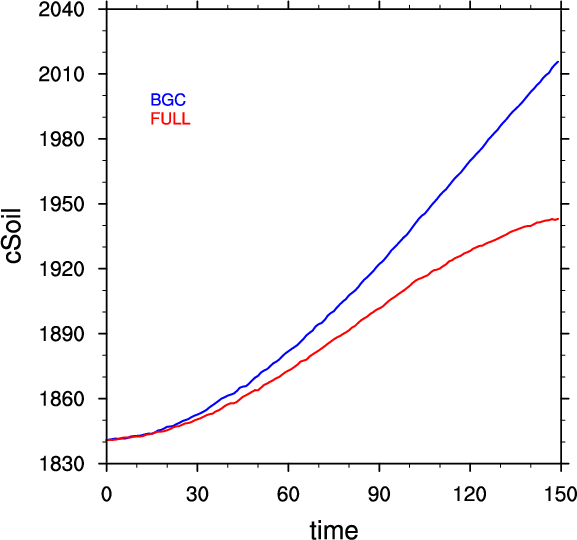

In [12]:
cSoilfilenames = [
['cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cSoil_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cSoil_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

cSoilfiles_bgc=[]
for i in range(len(cSoilfilenames[0])):
    cSoilfiles_bgc.append(nc4.Dataset(cSoilfilenames[0][i]))

cSoilfiles_ful=[]
for i in range(len(cSoilfilenames[1])):
    cSoilfiles_ful.append(nc4.Dataset(cSoilfilenames[1][i]))

cLitterfilenames = [
['cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
'cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
'cLitter_Lmon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'],
['cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
'cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
'cLitter_Lmon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc']
]

cLitterfiles_bgc=[]
for i in range(len(cLitterfilenames[0])):
    cLitterfiles_bgc.append(nc4.Dataset(cLitterfilenames[0][i]))

cLitterfiles_ful=[]
for i in range(len(cLitterfilenames[1])):
    cLitterfiles_ful.append(nc4.Dataset(cLitterfilenames[1][i]))

cSoil_bgc = np.ma.row_stack((cSoilfiles_bgc[0].variables['cSoil'][:]+cLitterfiles_bgc[0].variables['cLitter'][:],cSoilfiles_bgc[1].variables['cSoil'][:]+cLitterfiles_bgc[1].variables['cLitter'][:],cSoilfiles_bgc[2].variables['cSoil'][:]+cLitterfiles_bgc[2].variables['cLitter'][:]))
cSoil_bgc_annual = smoothlib.monthly_to_annual(cSoil_bgc)
cSoil_bgc_global_annual = geog_funcs.area_integrate(cSoil_bgc_annual, lat, lon, area=area_landonly)  / 1e12

cSoil_ful = np.ma.row_stack((cSoilfiles_ful[0].variables['cSoil'][:]+cLitterfiles_ful[0].variables['cLitter'][:],cSoilfiles_ful[1].variables['cSoil'][:]+cLitterfiles_ful[1].variables['cLitter'][:],cSoilfiles_ful[2].variables['cSoil'][:]+cLitterfiles_ful[2].variables['cLitter'][:]))
cSoil_ful_annual = smoothlib.monthly_to_annual(cSoil_ful)
cSoil_ful_global_annual = geog_funcs.area_integrate(cSoil_ful_annual, lat, lon, area=area_landonly) / 1e12

map_funcs.xyplot(np.arange(len(cSoil_ful_global_annual)), np.row_stack((cSoil_bgc_global_annual,cSoil_ful_global_annual)), file='c4mip_cSoil_global', ytitle='cSoil', xtitle='time', showjupyter=True, colors=['blue','red'], labels=['BGC','FULL'])






In [13]:
data_out_bgc = np.column_stack((np.arange(150),
                                tas_bgc_global_annual,
                                co2_bgc_global_annual,
                                atm2lnd_bgc_global_annual,
                                atm2ocn_gn_bgc_global_annual,
                                gpp_bgc_global_annual,
                                npp_bgc_global_annual,
                                rh_bgc_global_annual,
                                cVeg_bgc_global_annual,
                                cSoil_bgc_global_annual
                                ))

column_names = 'YEAR, ST, CO2, LA_CO2_FLUX, OA_CO2_FLUX, GPP, NPP, RH, CLIVE, CDEAD'

In [14]:
np.savetxt('data_out_bgc.csv', data_out_bgc, header=column_names, delimiter=',')